### This notebook shows how to load Matlab files containing parameter sweeps of cross-shore energy flux values at the off-shore boundary over variable pycnocline widths and depths, latitudes, and topographic parameters, and how to plot these results. 

The specifications for the base case in the paper are as follows:

- topography parameters: shelf width  $𝑥_𝑠=80$ km, slope width  $x_𝑊=32$ km, domain width  $𝐿=300$ km, deep ocean depth  $H=3100$ m, depth at the coast  $ℎ_𝑐=100$ m, depth at the shelf break  $ℎ_𝑠=150$ m;
- forcing: Baines body force on pressure 
- Coriolis parameter: $f=9.3\times 10^{-5}s^{-1}$
- forcing frequency: semi-diurnal $M_2$ tide $\omega=1.41\times 10^{-4}s^{-1}$

The ranges of parameters to be varied are:
- Coriolis frequency: $f \in [0.5\times10^{-4},1.35\times10^{-4}]\, \rm{s}^{-1}$
- slope width: $x_W \in [30, 60]\, \rm{km}$
- depth of shelf break: $h_s \in [150, 600]\, \rm{m}$
- ratio of depth at the coast to depth of shelf break: $h_c/h_s \in [0.5,1]$
- shelf width: $x_s \in [30,120]\, \rm{km}$

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat

First, we will look at an example of pycnocline depth of 400m and width of 200m. We will plot depth-integrated cross-shore energy flux at the off-shore boundary for as a function of Coriolis parameter $f$ and topographic parameters $x_W$, $h_s$, and $x_s$.

Open Matfile using loadmat module and extract all the data from the loaded dictionary.

In [2]:
example_data = loadmat('../data/Zpyc400_mupyc200_param_sweep.mat') #this is a dictionary

In [3]:
example_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xflux_hs_sweep', 'Xflux_xW_sweep', 'Xflux_xs_sweep', 'alpha_hs_sweep', 'alpha_xW_sweep', 'alpha_xs_sweep', 'f_vec', 'hs_vec', 'xW_vec', 'xs_vec'])

In [4]:
#VARIABLE PARAMETERS
f_vec = example_data['f_vec']  #vector of Coriolis parameter f [nf,]
hs_vec = example_data['hs_vec'] #vector of shelf break depth [nhs,]
xW_vec = example_data['xW_vec'] #vector of slope width [nxw,]
xs_vec = example_data['xs_vec'] #vector of shelf width [nxs,]

In [5]:
#OUTPUT VARIABLES
XFlux_hs_sweep = example_data['Xflux_hs_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
            # as function of (f,hs) size[nf,nhs]
XFlux_xW_sweep = example_data['Xflux_xW_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
            # as function of (f,xW) size[nf,nxw]
XFlux_xs_sweep = example_data['Xflux_xs_sweep']
            #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
            # as function of (f,hs) size[nf,nxs]        
        
alpha_hs_sweep = example_data['alpha_hs_sweep']
            #value of topographic criticality parameter \alpha
            # as function of (f,hs) size[nf,nhs]
alpha_xW_sweep = example_data['alpha_xW_sweep']
            #value of topographic criticality parameter \alpha
            # as function of (f,xW) size[nf,nxw]
alpha_xs_sweep = example_data['alpha_xs_sweep']
            #value of topographic criticality parameter \alpha
            # as function of (f,hs) size[nf,nxs]        

Now we will plot the vertically-integrated cross-shore energy flux at the off-shore boundary.

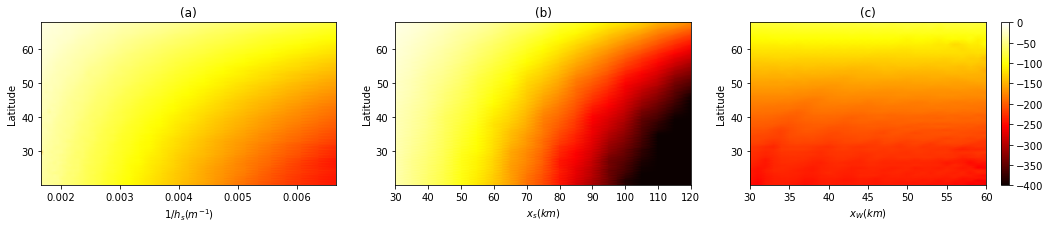

In [7]:
#Calculate latitude from f:
lat_vec = np.arcsin(f_vec/1.458e-4)*(180/np.pi);

fig, (ax0,ax1,ax2) = plt.subplots(ncols=3)
im = ax0.pcolormesh(1/hs_vec.reshape(hs_vec.shape[1]),lat_vec.reshape(lat_vec.shape[1],),
                    XFlux_hs_sweep,
                    shading='gouraud',
                   cmap=plt.get_cmap('hot'),vmin=-400, vmax=0)
#fig.colorbar(im, ax=ax2)
ax0.set_title('(a)')
ax0.set_xlabel('$1/h_s (m^{-1})$')
ax0.set_ylabel('Latitude');


im = ax1.pcolormesh(xs_vec.reshape(xs_vec.shape[1])/(1e3),lat_vec.reshape(lat_vec.shape[1],),
                    XFlux_xs_sweep,
                    shading='gouraud',
                   cmap=plt.get_cmap('hot'),vmin=-400, vmax=0)
#fig.colorbar(im, ax=ax2)
ax1.set_title('(b)')
ax1.set_xlabel('$x_s (km)$')
ax1.set_ylabel('Latitude');

im = ax2.pcolormesh(xW_vec.reshape(xW_vec.shape[1])/1e3,lat_vec.reshape(lat_vec.shape[1],),
                    XFlux_xW_sweep,
                    shading='gouraud',
                   cmap=plt.get_cmap('hot'),vmin=-400, vmax=0)
fig.colorbar(im, ax=ax2)
ax2.set_title('(c)')
ax2.set_xlabel('$x_W (km)$')
ax2.set_ylabel('Latitude');

plt.rcParams['figure.figsize'] = [18, 6]

Next, we will plot the sensitivity to the latitude for several different vertical stratification profiles (non-uniform and uniform stratification).

First, open the file and load data.

In [8]:
fvar_data = loadmat('../data/coriolis_sweep.mat') #this is a dictionary
fvar_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xflux_300_fsweep', 'Xflux_400_fsweep', 'Xflux_600_fsweep', 'Xflux_800_fsweep', 'Xflux_constN2_fsweep', 'alpha_300_fsweep', 'alpha_400_fsweep', 'alpha_600_fsweep', 'alpha_800_fsweep', 'alpha_constN2_fsweep', 'f_vec', 'mupyc_300', 'mupyc_400', 'mupyc_600', 'mupyc_800'])

In [9]:
#VARIABLE PARAMETERS
f_vec = fvar_data['f_vec']  #vector of Coriolis parameter f [nf,]
mupyc_300 = fvar_data['mupyc_300'] #pycnocline widths for 300m deep pycnocline [2,]
mupyc_400 = fvar_data['mupyc_400'] #pycnocline widths for 400m deep pycnocline [2,]
mupyc_600 = fvar_data['mupyc_600'] #pycnocline widths for 600m deep pycnocline [2,]
mupyc_800 = fvar_data['mupyc_800'] #pycnocline widths for 800m deep pycnocline [2,]

#OUTPUT VARIABLES
Xflux_300_fsweep = fvar_data['Xflux_300_fsweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of f for 300m deep pycnocline [2,nf]
alpha_300_fsweep = fvar_data['alpha_300_fsweep']
        #topographic criticality parameter alpha as a function of f for 300m deep pycnocline [2,nf]
Xflux_400_fsweep = fvar_data['Xflux_400_fsweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of f for 400m deep pycnocline [2,nf]
alpha_400_fsweep = fvar_data['alpha_400_fsweep']
        #topographic criticality parameter alpha as a function of f for 400m deep pycnocline [2,nf]
Xflux_600_fsweep = fvar_data['Xflux_600_fsweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of f for 600m deep pycnocline [2,nf]
alpha_600_fsweep = fvar_data['alpha_600_fsweep']
        #topographic criticality parameter alpha as a function of f for 600m deep pycnocline [2,nf]
Xflux_800_fsweep = fvar_data['Xflux_800_fsweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of f for 800m deep pycnocline [2,nf]
alpha_800_fsweep = fvar_data['alpha_800_fsweep']
        #topographic criticality parameter alpha as a function of f for 800m deep pycnocline [2,nf]

Xflux_constN2_fsweep = fvar_data['Xflux_constN2_fsweep'] 
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of f for constant stratification
alpha_constN2_fsweep = fvar_data['alpha_constN2_fsweep'] 
        #topographic criticality parameter alpha as a function of f for constant stratification

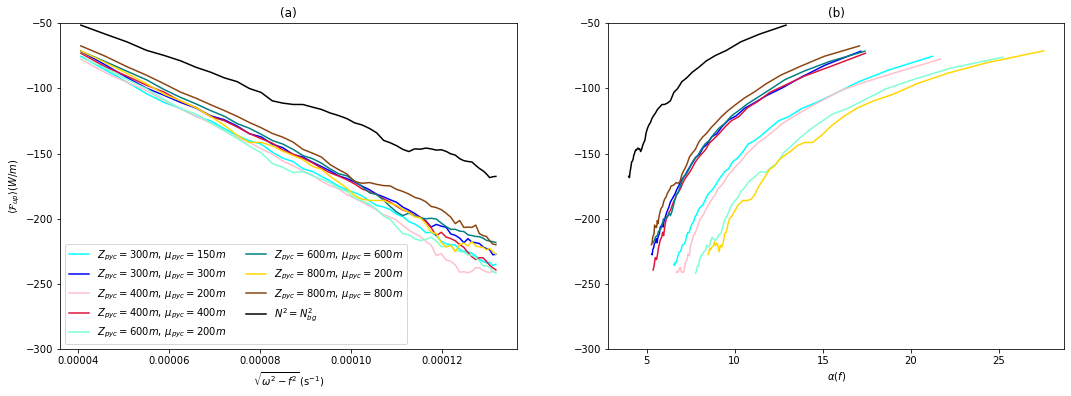

In [10]:
omega = 1.41e-4;

fig, (ax0,ax1) = plt.subplots(ncols=2)

ax0.plot(np.sqrt(omega**2 - f_vec**2).reshape((len(f_vec.T),)),Xflux_300_fsweep[0,:],color='cyan',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=150m$')
ax0.plot(np.sqrt(omega**2 - f_vec**2).reshape((len(f_vec.T),)),Xflux_300_fsweep[1,:],color='blue',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=300m$')
ax0.plot(np.sqrt(omega**2 - f_vec**2).reshape((len(f_vec.T),)),Xflux_400_fsweep[0,:],color='pink',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=200m$')
ax0.plot(np.sqrt(omega**2 - f_vec**2).reshape((len(f_vec.T),)),Xflux_400_fsweep[1,:],color='crimson',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=400m$')
ax0.plot(np.sqrt(omega**2 - f_vec**2).reshape((len(f_vec.T),)),Xflux_600_fsweep[0,:],color='aquamarine',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=200m$')
ax0.plot(np.sqrt(omega**2 - f_vec**2).reshape((len(f_vec.T),)),Xflux_600_fsweep[1,:],color='teal',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=600m$')
ax0.plot(np.sqrt(omega**2 - f_vec**2).reshape((len(f_vec.T),)),Xflux_800_fsweep[0,:],color='gold',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=200m$')
ax0.plot(np.sqrt(omega**2 - f_vec**2).reshape((len(f_vec.T),)),Xflux_800_fsweep[1,:],color='saddlebrown',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=800m$')
ax0.plot(np.sqrt(omega**2 - f_vec**2).reshape((len(f_vec.T),)),Xflux_constN2_fsweep,'k',
        label=r'$N^2 = N^2_{bg}$')
ax0.set_xlabel(r'$\sqrt{\omega^2-f^2}\,(\rm{s}^{-1})$')
ax0.set_ylabel(r'$\langle \mathcal{F}_{up} \rangle (W/m)$');
ax0.set_title('(a)');
ax0.legend(ncol=2)
ax0.set_ylim([-300,-50])

ax1.plot(alpha_300_fsweep[0,:],Xflux_300_fsweep[0,:],color='cyan',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=150m$')
ax1.plot(alpha_300_fsweep[1,:],Xflux_300_fsweep[1,:],color='blue',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=300m$')
ax1.plot(alpha_400_fsweep[0,:],Xflux_400_fsweep[0,:],color='pink',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=200m$')
ax1.plot(alpha_400_fsweep[1,:],Xflux_400_fsweep[1,:],color='crimson',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=400m$')
ax1.plot(alpha_600_fsweep[0,:],Xflux_600_fsweep[0,:],color='aquamarine',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=200m$')
ax1.plot(alpha_600_fsweep[1,:],Xflux_600_fsweep[1,:],color='teal',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=600m$')
ax1.plot(alpha_800_fsweep[0,:],Xflux_800_fsweep[0,:],color='gold',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=200m$')
ax1.plot(alpha_800_fsweep[1,:],Xflux_800_fsweep[1,:],color='saddlebrown',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=800m$')
ax1.plot(alpha_constN2_fsweep,Xflux_constN2_fsweep,'k',
        label=r'$N^2 = N^2_{bg}$')
ax1.set_xlabel(r'$\alpha(f)$')
#ax1.set_ylabel(r'$\langle \mathcal{F}_{up} \rangle (W/m)$');
ax1.set_title('(b)');
#ax1.legend(ncol=2)
ax1.set_ylim([-300,-50])


plt.rcParams['figure.figsize'] = [18, 6];

Now, we will repeat the procedure and plot the sensitivity to the different topographic parameters (shelf depth, shelf width, slope width) for several different vertical stratification profiles (non-uniform and uniform stratification).

For simplicity, here we will only plot the results for $h_c/h_s=0.5$.

In [11]:
hs_data = loadmat('../data/shelfdepth_sweep.mat') #this is a dictionary

#VARIABLE PARAMETERS
hs_vec = hs_data['hs_vec']  #vector of shelf depths [nhs,]
hc_vec = hs_data['hc_vec']  #vector of ratio of coast depth to shelf depth [2,]
mupyc_300 = hs_data['mupyc_300'] #pycnocline widths for 300m deep pycnocline [2,]
mupyc_400 = hs_data['mupyc_400'] #pycnocline widths for 400m deep pycnocline [2,]
mupyc_600 = hs_data['mupyc_600'] #pycnocline widths for 600m deep pycnocline [2,]
mupyc_800 = hs_data['mupyc_800'] #pycnocline widths for 800m deep pycnocline [2,]

#OUTPUT VARIABLES
Xflux_300_hssweep = hs_data['Xflux_300_hssweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of hs for 300m deep pycnocline [2,2,nhs]
alpha_300_hssweep = hs_data['alpha_300_hssweep']
        #topographic criticality parameter alpha as a function of hs for 300m deep pycnocline [2,2,nhs]
Xflux_400_hssweep = hs_data['Xflux_400_hssweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of hs for 400m deep pycnocline [2,2,nhs]
alpha_400_hssweep = hs_data['alpha_400_hssweep']
        #topographic criticality parameter alpha as a function of hs for 400m deep pycnocline [2,2,nhs]
Xflux_600_hssweep = hs_data['Xflux_600_hssweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of hs for 600m deep pycnocline [2,2,nhs]
alpha_600_hssweep = hs_data['alpha_600_hssweep']
        #topographic criticality parameter alpha as a function of hs for 600m deep pycnocline [2,2,nhs]
Xflux_800_hssweep = hs_data['Xflux_800_hssweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of hs for 800m deep pycnocline [2,2,nhs]
alpha_800_hssweep = hs_data['alpha_800_hssweep']
        #topographic criticality parameter alpha as a function of hs for 800m deep pycnocline [2,2,nhs]

Xflux_constN2_hssweep = hs_data['Xflux_constN2_hssweep'] 
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of hs for constant stratification
alpha_constN2_hssweep = hs_data['alpha_constN2_hssweep'] 
        #topographic criticality parameter alpha as a function of hs for constant stratification

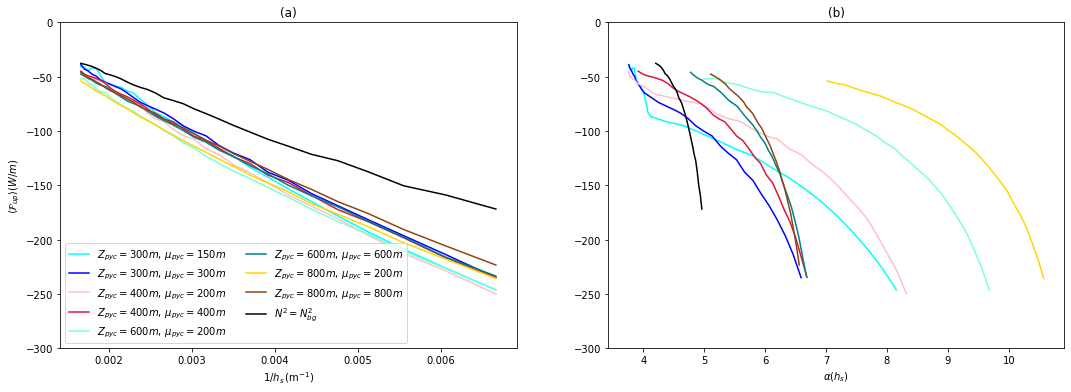

In [12]:
omega = 1.41e-4;

fig, (ax0,ax1) = plt.subplots(ncols=2)

ax0.plot(1/hs_vec.reshape((len(hs_vec.T),)),Xflux_300_hssweep[0,0,:],color='cyan',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=150m$')
ax0.plot(1/hs_vec.reshape((len(hs_vec.T),)),Xflux_300_hssweep[1,0,:],color='blue',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=300m$')
ax0.plot(1/hs_vec.reshape((len(hs_vec.T),)),Xflux_400_hssweep[0,0,:],color='pink',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=200m$')
ax0.plot(1/hs_vec.reshape((len(hs_vec.T),)),Xflux_400_hssweep[1,0,:],color='crimson',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=400m$')
ax0.plot(1/hs_vec.reshape((len(hs_vec.T),)),Xflux_600_hssweep[0,0,:],color='aquamarine',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=200m$')
ax0.plot(1/hs_vec.reshape((len(hs_vec.T),)),Xflux_600_hssweep[1,0,:],color='teal',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=600m$')
ax0.plot(1/hs_vec.reshape((len(hs_vec.T),)),Xflux_800_hssweep[0,0,:],color='gold',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=200m$')
ax0.plot(1/hs_vec.reshape((len(hs_vec.T),)),Xflux_800_hssweep[1,0,:],color='saddlebrown',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=800m$')
ax0.plot(1/hs_vec.reshape((len(hs_vec.T),)),Xflux_constN2_hssweep[0,:],'k',
        label=r'$N^2 = N^2_{bg}$')
ax0.set_xlabel(r'$1/h_s\,(\rm{m}^{-1})$')
ax0.set_ylabel(r'$\langle \mathcal{F}_{up} \rangle (W/m)$');
ax0.set_title('(a)');
ax0.legend(ncol=2)
ax0.set_ylim([-300,0])

ax1.plot(alpha_300_hssweep[0,0,:],Xflux_300_hssweep[0,0,:],color='cyan',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=150m$')
ax1.plot(alpha_300_hssweep[1,0,:],Xflux_300_hssweep[1,0,:],color='blue',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=300m$')
ax1.plot(alpha_400_hssweep[0,0,:],Xflux_400_hssweep[0,0,:],color='pink',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=200m$')
ax1.plot(alpha_400_hssweep[1,0,:],Xflux_400_hssweep[1,0,:],color='crimson',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=400m$')
ax1.plot(alpha_600_hssweep[0,0,:],Xflux_600_hssweep[0,0,:],color='aquamarine',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=200m$')
ax1.plot(alpha_600_hssweep[1,0,:],Xflux_600_hssweep[1,0,:],color='teal',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=600m$')
ax1.plot(alpha_800_hssweep[0,0,:],Xflux_800_hssweep[0,0,:],color='gold',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=200m$')
ax1.plot(alpha_800_hssweep[1,0,:],Xflux_800_hssweep[1,0,:],color='saddlebrown',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=800m$')
ax1.plot(alpha_constN2_hssweep[0,:],Xflux_constN2_hssweep[0,:],'k',
        label=r'$N^2 = N^2_{bg}$')
ax1.set_xlabel(r'$\alpha(h_s)$')
#ax1.set_ylabel(r'$\langle \mathcal{F}_{up} \rangle (W/m)$');
ax1.set_title('(b)');
#ax1.legend(ncol=2)
ax1.set_ylim([-300,0])


plt.rcParams['figure.figsize'] = [18, 6];

In [13]:
xs_data = loadmat('../data/shelfwidth_sweep.mat') #this is a dictionary

#VARIABLE PARAMETERS
xs_vec = xs_data['xs_vec']  #vector of shelf depths [nhs,]
hc_vec = xs_data['hc_vec']  #vector of ratio of coast depth to shelf depth [2,]
mupyc_300 = xs_data['mupyc_300'] #pycnocline widths for 300m deep pycnocline [2,]
mupyc_400 = xs_data['mupyc_400'] #pycnocline widths for 400m deep pycnocline [2,]
mupyc_600 = xs_data['mupyc_600'] #pycnocline widths for 600m deep pycnocline [2,]
mupyc_800 = xs_data['mupyc_800'] #pycnocline widths for 800m deep pycnocline [2,]

#OUTPUT VARIABLES
Xflux_300_xssweep = xs_data['Xflux_300_xssweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of xs for 300m deep pycnocline [2,2,nxs]
Xflux_400_xssweep = xs_data['Xflux_400_xssweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of xs for 400m deep pycnocline [2,2,nxs]
Xflux_600_xssweep = xs_data['Xflux_600_xssweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of xs for 600m deep pycnocline [2,2,nxs]
Xflux_800_xssweep = xs_data['Xflux_800_xssweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of xs for 800m deep pycnocline [2,2,nxs]

Xflux_constN2_xssweep = xs_data['Xflux_constN2_xssweep'] 
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of xs for constant stratification

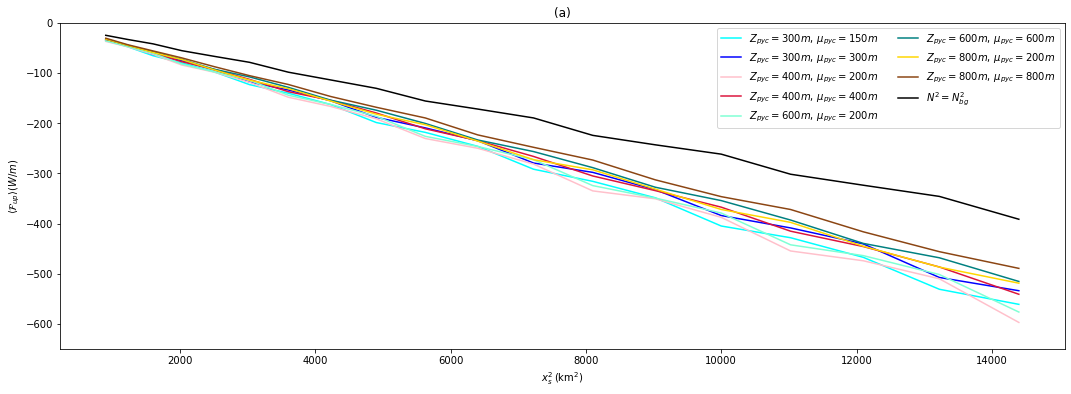

In [14]:
fig, (ax0) = plt.subplots(ncols=1)

xs = xs_vec.reshape((len(xs_vec.T),))
xs2 = (xs/1.e3)**2

ax0.plot(xs2,Xflux_300_xssweep[0,0,:],color='cyan',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=150m$')
ax0.plot(xs2,Xflux_300_xssweep[1,0,:],color='blue',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=300m$')
ax0.plot(xs2,Xflux_400_xssweep[0,0,:],color='pink',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=200m$')
ax0.plot(xs2,Xflux_400_xssweep[1,0,:],color='crimson',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=400m$')
ax0.plot(xs2,Xflux_600_xssweep[0,0,:],color='aquamarine',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=200m$')
ax0.plot(xs2,Xflux_600_xssweep[1,0,:],color='teal',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=600m$')
ax0.plot(xs2,Xflux_800_xssweep[0,0,:],color='gold',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=200m$')
ax0.plot(xs2,Xflux_800_xssweep[1,0,:],color='saddlebrown',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=800m$')
ax0.plot(xs2,Xflux_constN2_xssweep[0,:],'k',
        label=r'$N^2 = N^2_{bg}$')
ax0.set_xlabel(r'$x_s^2\,(\rm{km}^2)$')
ax0.set_ylabel(r'$\langle \mathcal{F}_{up} \rangle (W/m)$');
ax0.set_title('(a)');
ax0.legend(ncol=2)
ax0.set_ylim([-650,0])
plt.rcParams['figure.figsize'] = [18, 6];

In [15]:
xw_data = loadmat('../data/slopewidth_sweep.mat') #this is a dictionary

#VARIABLE PARAMETERS
xW_vec = xw_data['xW_vec']  #vector of slope widths [nxw,]
hc_vec = xw_data['hc_vec']  #vector of ratio of coast depth to shelf depth [2,]
mupyc_300 = xw_data['mupyc_300'] #pycnocline widths for 300m deep pycnocline [2,]
mupyc_400 = xw_data['mupyc_400'] #pycnocline widths for 400m deep pycnocline [2,]
mupyc_600 = xw_data['mupyc_600'] #pycnocline widths for 600m deep pycnocline [2,]
mupyc_800 = xw_data['mupyc_800'] #pycnocline widths for 800m deep pycnocline [2,]

#OUTPUT VARIABLES
Xflux_300_xwsweep = xw_data['Xflux_300_xWsweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of xW for 300m deep pycnocline [2,2,nxw]
alpha_300_xwsweep = xw_data['alpha_300_xWsweep']
        #topographic criticality parameter alpha as a function of xW for 300m deep pycnocline [2,2,nxw]
Xflux_400_xwsweep = xw_data['Xflux_400_xWsweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of xW for 400m deep pycnocline [2,2,nxw]
alpha_400_xwsweep = xw_data['alpha_400_xWsweep']
        #topographic criticality parameter alpha as a function of xW for 400m deep pycnocline [2,2,nxw]
Xflux_600_xwsweep = xw_data['Xflux_600_xWsweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of xW for 600m deep pycnocline [2,2,nxw]
alpha_600_xwsweep = xw_data['alpha_600_xWsweep']
        #topographic criticality parameter alpha as a function of xW for 600m deep pycnocline [2,2,nxw]
Xflux_800_xwsweep = xw_data['Xflux_800_xWsweep']
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of xW for 800m deep pycnocline [2,2,nxw]
alpha_800_xwsweep = xw_data['alpha_800_xWsweep']
        #topographic criticality parameter alpha as a function of xW for 800m deep pycnocline [2,2,nxw]

Xflux_constN2_xwsweep = xw_data['Xflux_constN2_xWsweep'] 
        #value of vertically-integrated cross-shore energy flux (W/m) at the off-shore boundary
        #   as a function of xW for constant stratification
alpha_constN2_xwsweep = xw_data['alpha_constN2_xWsweep'] 
        #topographic criticality parameter alpha as a function of xW for constant stratification

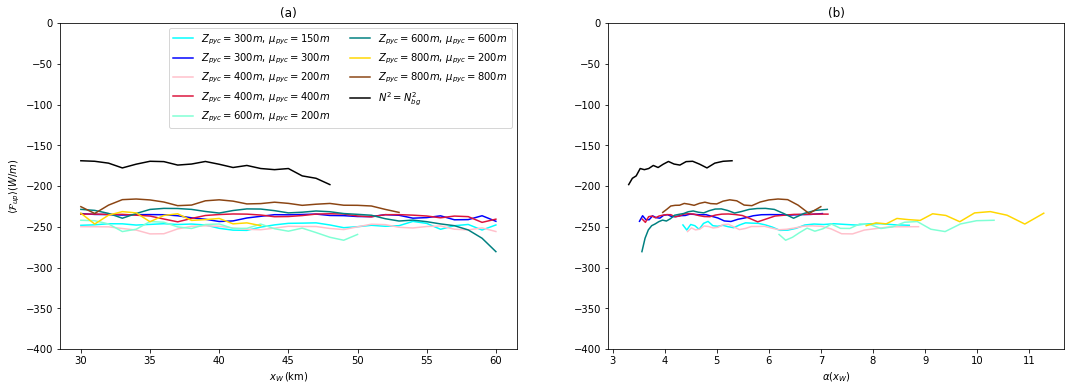

In [16]:
omega = 1.41e-4;

fig, (ax0,ax1) = plt.subplots(ncols=2)

ax0.plot(xW_vec.reshape((len(xW_vec.T),))/1e3,Xflux_300_xwsweep[0,0,:],color='cyan',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=150m$')
ax0.plot(xW_vec.reshape((len(xW_vec.T),))/1e3,Xflux_300_xwsweep[1,0,:],color='blue',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=300m$')
ax0.plot(xW_vec.reshape((len(xW_vec.T),))/1e3,Xflux_400_xwsweep[0,0,:],color='pink',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=200m$')
ax0.plot(xW_vec.reshape((len(xW_vec.T),))/1e3,Xflux_400_xwsweep[1,0,:],color='crimson',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=400m$')
ax0.plot(xW_vec.reshape((len(xW_vec.T),))[0:21]/1e3,Xflux_600_xwsweep[0,0,0:21],color='aquamarine',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=200m$')
ax0.plot(xW_vec.reshape((len(xW_vec.T),))/1e3,Xflux_600_xwsweep[1,0,:],color='teal',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=600m$')
ax0.plot(xW_vec.reshape((len(xW_vec.T),))[0:14]/1e3,Xflux_800_xwsweep[0,0,0:14],color='gold',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=200m$')
ax0.plot(xW_vec.reshape((len(xW_vec.T),))[0:24]/1e3,Xflux_800_xwsweep[1,0,0:24],color='saddlebrown',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=800m$')
ax0.plot(xW_vec.reshape((len(xW_vec.T),))[0:19]/1e3,Xflux_constN2_xwsweep[0,0:19],'k',
        label=r'$N^2 = N^2_{bg}$')
ax0.set_xlabel(r'$x_W\,(\rm{km})$')
ax0.set_ylabel(r'$\langle \mathcal{F}_{up} \rangle (W/m)$');
ax0.set_title('(a)');
ax0.legend(ncol=2)
ax0.set_ylim([-400,0])

ax1.plot(alpha_300_xwsweep[0,0,:],Xflux_300_xwsweep[0,0,:],color='cyan',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=150m$')
ax1.plot(alpha_300_xwsweep[1,0,:],Xflux_300_xwsweep[1,0,:],color='blue',
        label=r'$Z_{pyc}=300m,\,\mu_{pyc}=300m$')
ax1.plot(alpha_400_xwsweep[0,0,:],Xflux_400_xwsweep[0,0,:],color='pink',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=200m$')
ax1.plot(alpha_400_xwsweep[1,0,:],Xflux_400_xwsweep[1,0,:],color='crimson',
        label=r'$Z_{pyc}=400m,\,\mu_{pyc}=400m$')
ax1.plot(alpha_600_xwsweep[0,0,0:21],Xflux_600_xwsweep[0,0,0:21],color='aquamarine',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=200m$')
ax1.plot(alpha_600_xwsweep[1,0,:],Xflux_600_xwsweep[1,0,:],color='teal',
        label=r'$Z_{pyc}=600m,\,\mu_{pyc}=600m$')
ax1.plot(alpha_800_xwsweep[0,0,0:14],Xflux_800_xwsweep[0,0,0:14],color='gold',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=200m$')
ax1.plot(alpha_800_xwsweep[1,0,0:24],Xflux_800_xwsweep[1,0,0:24],color='saddlebrown',
        label=r'$Z_{pyc}=800m,\,\mu_{pyc}=800m$')
ax1.plot(alpha_constN2_xwsweep[0,0:19],Xflux_constN2_xwsweep[0,0:19],'k',
        label=r'$N^2 = N^2_{bg}$')
ax1.set_xlabel(r'$\alpha(x_W)$')
#ax1.set_ylabel(r'$\langle \mathcal{F}_{up} \rangle (W/m)$');
ax1.set_title('(b)');
#ax1.legend(ncol=2)
ax1.set_ylim([-400,0])


plt.rcParams['figure.figsize'] = [18, 6];